### Three year summary Lake Geneva

#### Notebook 3

__Purpose:__ Present an analysis method for survey results from beach litter inventories on Lake Geneva.

__Background:__ This is in the context of the global movement to reduce plastic debris in the maritime environment. Riverine inputs are major contributors of plastic debris (and all types of refuse) to the oceans. This is an analysis of the data collected on the shores of Lake Geneva over a three year period. The maritime protocol was modified in very specific ways to adjust for the local geography and population density.

### Research question: Is this a representative sample ?

#### From notebooks one and two we can assume the following:

1. The data was collected at different locations
2. The data was collected by different groups of people
3. For each year there is one group that collected 50% or more of the samples
4. The mean for each year is 9pcs/m +/- 1
5. The median for each year is 5.5pcs/m +/- 1.3
6. The numnber of samples for each year is different
7. Each year has a geographic center
8. All the particpants recieved training on a standardized protocol

#### The survey totals, in pieces of trash per meter, can be summarised as follows:


| Statistic     | Year one | Year two | Year three | Combined   |   
|--------------:|:--------:|:--------:|:----------:|:-----:|
| __Samples__   | <span style="color:red">83</span>       |41        |24          | 148   |
| __mean__      | 8.77     |<span style="color:red">9.99</span>      |9.01        | 9.16  |
| __median__    | 4.83     |<span style="color:red">6.84</span>     |4.24        | 5.52  |
| __Std dev__   | 9.92     |8.52      |<span style="color:red">16.14</span>      |10.75  |
| __25\%ile__   | 3.113    |<span style="color:red">4.41</span>     |2.36        | 3.18  |
| __75\%ile__   | 10.405   |<span style="color:red">12.35</span>    |7.79        | 11.24 | 
| __Minimum__   | 0.68   |0.57      |<span style="color:red">0.11 </span>        | 0.11  | 
| __Maximum__   | 50.075   |39.54     |<span style="color:red">77.05 </span>      | 77.05| 
| _MCBP samples_   |<span style="color:red">80</span>  |<span style="color:red">22</span>    |5   | <span style="color:red">107</span>| 
| _SLR samples_   |0  |18    |<span style="color:red">15</span>      | 33|
| _EPFL samples_  |2 |2     |2| 6| 
| _PC samples_  | 0 |0   |2       | 2| 


### Object category frequency and density year over year:

1. _What are the most common categories identified?_
2. _What are the differences between groups and year over year results?_
3. _How do the individual results relate to the cumulative results?_

In [1]:
# import numpy as np
import json
import csv
import datetime
import collections
# import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib import cm
# from colorspacious import cspace_converter
from matplotlib import colors as mcolors
from matplotlib.ticker import MultipleLocator
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from Utilities.utility_functions import *

In [2]:
# The data is off of the API at https://mwshovel.pythonanywhere.com/dirt/api_home.html 
# You will have the opportunity to save the data locally
# get some file structures in place

# Required variables:
folders = ["Data", "Charts", "Utilities"]
here = os.getcwd()

# check for existing and if not make folders
check_for_folders(folders, here)

# make a dictionary to call path by directory name
my_folders = make_folders(folders, here)

Directory already in place


In [3]:
# Read the JSON data in from local
# there is no need to hit the server a million times

# required variables
the_jsons = [
    '/home/mw-shovel/three_year_final/Data/beach_info.json',
    '/home/mw-shovel/three_year_final/Data/all_data.json'
]

idx = pd.IndexSlice
# all the survey results by code, location, date, project:
my_survey_results = jsonFileGet(the_jsons[1])
def changeProjectName(aList, otherList, projectName):
    aNewList = []   
    for eachDict in aList:       
        if eachDict["location_id"] in otherList:
            eachDict['project_id'] = projectName
            aNewList.append(eachDict)
        else:
            aNewList.append(eachDict)
    return aNewList
            
location_list = ["Plage-de-St-Sulpice", "Parc-des-Pierrettes",  "Tiger-duck-beach", "Saint-Sulpice"]
project_name = "tiger-duck"
my_survey_resultsx = changeProjectName(my_survey_results, location_list, project_name)

# all the location information:
beach_info = jsonFileGet(the_jsons[0])

code_description = pd.read_csv("Data/mlw_code_defs.csv").to_dict(orient="records")
code_describe = {x["code"]:[x["material"],x["description"],x["source"]] for x in code_description}
code_describe["G178"] = ['Metal', 'Metal bottle caps & lids', 'Food']

# make a data frame:
the_survey_results = pd.DataFrame(my_survey_resultsx)    

In [4]:
# making a pcs/m column:

# the_survey_results["pcs_m"] = the_survey_results["quantity"]/the_survey_results["length"]

# making a month, day and year column from a datetime object
# makes sorting easier
the_survey_results["py_date"] = pd.to_datetime(the_survey_results["date"])
the_survey_results["py_month"] = the_survey_results["py_date"].dt.month
the_survey_results["py_year"] = the_survey_results["py_date"].dt.year
the_survey_results["py_day"] = the_survey_results["py_date"].dt.weekday

In [5]:
#### one df for abundance and one df for density:
abundance = the_survey_results[["project_id", "location_id", "date","py_date", "py_month", "py_year", "code_id", "quantity"]].copy()
density = the_survey_results[["project_id", "location_id", "date","py_date", "py_day","py_month", "py_year", "code_id", "pcs_m"]].copy()  

In [6]:
year_one_end_start = convertStringToDate([("2015-11-15", "2016-11-14")])
year_two_end_start = convertStringToDate([("2016-11-15", "2017-11-14")])
year_three_end_start=convertStringToDate([("2017-11-15", "2018-11-14")])
start_date = datetime.datetime.strptime("2015-11-15", "%Y-%m-%d")
end_date = datetime.datetime.strptime("2018-11-14", "%Y-%m-%d")

In [7]:
colors = [
    "midnightblue",
    "darkblue",
    "blue",
    "darkslateblue",
    "mediumpurple",
    "blueviolet",
    "darkorchid",
    "mediumorchid",
    "plum",
    "purple",
    "fuchsia",
    "skyblue",
    "steelblue",
    "darkseagreen",
    "lightgreen",
    "chocolate",
    "darkolivegreen",
    "maroon",
    "tomato",
    "black"
]
def percentOfTotalAndFrequency(quantDict, freqDict, total, num_samps):
    new_dict = {} 
    for k,v in quantDict.items():
        freq = freqDict[k]
        new_dict.update({k:[v,v/total,freq,freq/num_samps]})
    return new_dict
def quantityFrequency(quant, freq, codes):
    qVsF = []
    for code in codes:
        qVsF.append([code, quant[code], freq[code]])
    return qVsF
def getDataByDateRange(data, end_start):
    this_data = data[(data['py_date'] >= end_start[0][0]) & (data['py_date'] <= end_start[0][1])]
    return this_data
def getCodeTotalsFromDateRange(data):
    return data.groupby(['code_id'])["quantity"].aggregate(np.sum).sort_values(ascending=False)
def getCodeFrequencyFromDateRange(data):
    return data.groupby(["code_id"])['code_id'].count().sort_values(ascending=False)
def getNumSamps(data):
    return data[['location_id', 'py_date','quantity']].groupby(['location_id', 'py_date']).sum().count().values[0]
def getTuplesFromSeries(data):
    return list(zip(data.index, data))
def getTheRest(aList, total_quant):
    some_number = 0
    for x in aList:
        some_number += x[1]
    return total_quant - some_number
def makeBlocks(the_data_study, percent, end_start, total_quant):    
    code_totals = getCodeTotalsFromDateRange(the_data_study)
    code_totals_tuple = getTuplesFromSeries(code_totals)
    code_greater_than = [
        (x[0],x[1],colors[i],code_describe[x[0]][1])
        for i,x in enumerate(code_totals_tuple)
        if x[1] >= percent
    ]
    the_rest = getTheRest(code_greater_than, total_quant)
    code_greater_than.append(("Other", the_rest,"thistle", "*All other objects"))
    return code_greater_than

In [8]:
# required variables

step = 2000

# title and sup title
title_color = "black"
min_date = "Nov-2015"
max_date = "Nov-2018"
# n_samples = len(code_greater_than)
font_styles = {
    'fontsize': 12,
    'fontfamily':'sans-serif',
    'fontweight' : 'normal',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
}
title_text = "All objects found"
sub_title_text = "Lake Geneva"
pad = 15

# legend
b_box = (1,1.02)
frameAlpha=1
frameEdgeColor="black"
loc="best"
legend_title_size = 14
legend_font_size = 11
# labels

y_label_size = 12
y_label_color = "black"
y_label_padding = 15

# annotate
data_coords = (-0.2, 5.66)
text_coords = (-0.25, 35)
connection_style="arc3, rad=0.3"
# plots
opac=0.5
marker_size = 10
edge_color = "#ffffff"
flierprops = dict(marker='o', markersize=6, markerfacecolor='black')
top_adjust=0.87
# storing output
file_prefix = my_folders["Charts"]
file_suffix = [
    '.svg',
    '.png',    
]
file_names="topTenBarChartAll"

# category colors
PROJECT_COLORS = [
    "indigo",
    "darkcyan",
    "olive",
    "darkred",
    
]

color = "wheat"

In [9]:
def iterateBarchartBlocks(the_data_study, percent, end_start, title_text, sub_title_text):
    fig, ax = plt.subplots(figsize=(3,6))
    
    the_data_for_study = getDataByDateRange(the_data_study, end_start)
    total_quant = the_data_for_study.quantity.sum()
    
    projects = the_data_for_study.project_id.unique()
    project_colors = dict(zip(projects, PROJECT_COLORS))
    
    y_limit = total_quant
    y_max = y_limit + 2
    the_percent = total_quant*percent
    
    title = "{},  total={:,}".format(title_text, total_quant)
    sub_title = '{}, {} - {}'.format(sub_title_text, min_date, max_date)
   
    
    the_bottom = 0
    the_data = makeBlocks(the_data_for_study, the_percent, end_start, total_quant)
   
    for i,block in enumerate(the_data):
       
        if i == 0:            
            ax.bar(1, block[1], color=block[2],
                    label="{}: {:,}".format(block[3],block[1]))
            the_bottom += block[1]
        else:            
            ax.bar(1, block[1], color=block[2],
                   bottom=the_bottom,
                   label="{}: {:,}".format(block[3],block[1]))
            the_bottom += block[1]
    plt.subplots_adjust(top=top_adjust)
    plt.xticks([0])
    plt.ylim(0, y_max)
    plt.ylabel('Number of objects found',fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size)
    plt.xlabel("*Identified items equal to less than 1% of the total.\nCaps and lids are plastic unless noted.", fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size, ha="left", x=0)
    plt.suptitle(title, fontfamily="sans-serif", fontweight="roman", fontsize=14, x=0.13, ha="left", color=title_color)
    plt.title(sub_title, fontdict=font_styles, pad=pad, x=0, ha="left", color=title_color)
    handles, labels = ax.get_legend_handles_labels()
    this = ax.legend(handles[::-1], labels[::-1], title='Object description: quantity',title_fontsize=legend_title_size, fontsize=legend_font_size, bbox_to_anchor=b_box, loc='upper left')
    this._legend_box.align = "left"
#     for x in file_suffix:
#         save_me = '{}/{}{}'.format(file_prefix, file_names, x)
#         plt.savefig(save_me, bbox_inches="tight")     
    plt.show()
    plt.close()  

In [10]:
def iterateBarchartBlocks(the_data_study, percent, end_start, title_text, sub_title_text):
    fig, ax = plt.subplots(figsize=(3,6))
    
    the_data_for_study = getDataByDateRange(the_data_study, end_start)
    total_quant = the_data_for_study.quantity.sum()
    
    projects = the_data_for_study.project_id.unique()
    project_colors = dict(zip(projects, PROJECT_COLORS))
    
    y_limit = total_quant
    y_max = y_limit + 2
    the_percent = total_quant*percent
    
    title = "{},  total={:,}".format(title_text, total_quant)
    sub_title = '{}, {} - {}'.format(sub_title_text, min_date, max_date)
   
    
    the_bottom = 0
    the_data = makeBlocks(the_data_for_study, the_percent, end_start, total_quant)
   
    for i,block in enumerate(the_data):
       
        if i == 0:            
            ax.bar(1, block[1], color=block[2],
                    label="{}: {:,}".format(block[3],block[1]))
            the_bottom += block[1]
        else:            
            ax.bar(1, block[1], color=block[2],
                   bottom=the_bottom,
                   label="{}: {:,}".format(block[3],block[1]))
            the_bottom += block[1]
    plt.subplots_adjust(top=top_adjust)
    plt.xticks([0])
    plt.ylim(0, y_max)
    plt.ylabel('Number of objects found',fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size)
    plt.xlabel("*Identified items equal to less than 1% of the total.\nCaps and lids are plastic unless noted.", fontfamily="sans-serif", labelpad=y_label_padding, color=y_label_color, size=y_label_size, ha="left", x=0)
    plt.suptitle(title, fontfamily="sans-serif", fontweight="roman", fontsize=14, x=0.13, ha="left", color=title_color)
    plt.title(sub_title, fontdict=font_styles, pad=pad, x=0, ha="left", color=title_color)
    handles, labels = ax.get_legend_handles_labels()
    this = ax.legend(handles[::-1], labels[::-1], title='Object description: quantity',title_fontsize=legend_title_size, fontsize=legend_font_size, bbox_to_anchor=b_box, loc='upper left')
    this._legend_box.align = "left"
#     for x in file_suffix:
#         save_me = '{}/{}{}'.format(file_prefix, file_names, x)
#         plt.savefig(save_me, bbox_inches="tight")     
    plt.show()
    plt.close()  

### Cumulative results all surveys Nov 2015 - Nov 2018

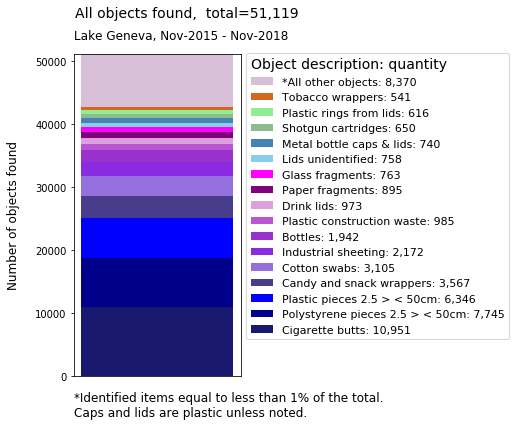

In [11]:
iterateBarchartBlocks(abundance, .01, [(start_date, end_date)], title_text, sub_title_text)

### Year one

In [12]:
# required variables
step = 2000


min_date = "Nov-2015"
max_date = "Nov-2016"
title_text = "Year one all objects found"
sub_title_text = 'Lake Geneva'
top_adjust=0.87
# storing output
file_prefix = my_folders["Charts"]
file_suffix = [
    '.svg',
    '.png',    
]
file_names="topTenBarChartYearOne"


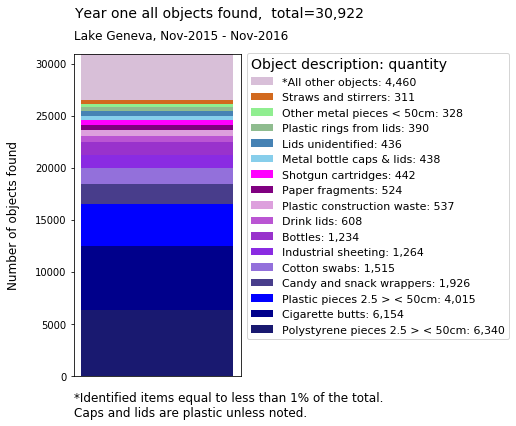

In [13]:
iterateBarchartBlocks(abundance,.01 , year_one_end_start,  title_text, sub_title_text)

### Year two

In [14]:
# required variables
step = 2000

min_date = "Nov-2016"
max_date = "Nov-2017"
title_text = "Year two all objects found"
sub_title_text = 'Lake Geneva'

file_prefix = my_folders["Charts"]
file_suffix = [
    '.svg',
    '.png',    
]
file_names="topTenBarChartYearTwo"

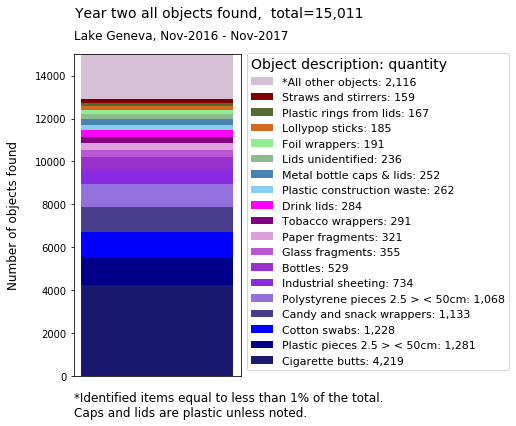

In [15]:
iterateBarchartBlocks(abundance, .01, year_two_end_start, title_text, sub_title_text)

### Year three

In [16]:
# required variables
step = 2000

min_date = "Nov-2017"
max_date = "Nov-2018"
title_text = "Year three"
sub_title_text = 'Lake Geneva'


top_adjust=0.87
# storing output
file_prefix = my_folders["Charts"]
file_suffix = [
    '.svg',
    '.png',    
]
file_names="topTenBarChartYearThree"

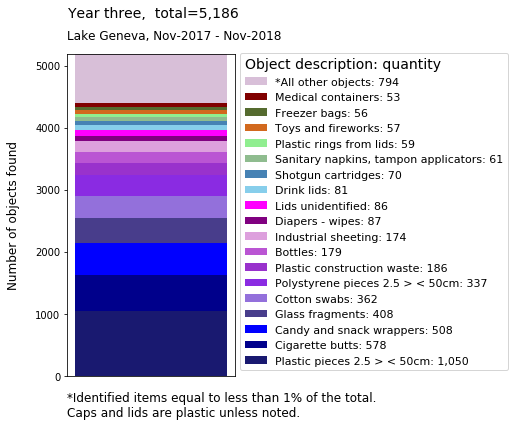

In [17]:
iterateBarchartBlocks(abundance, .01, year_three_end_start, title_text, sub_title_text)